In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.8/150.0 MB 479.2 kB/s eta 0:05:12
   ---------------------------------------- 1.0/150.0 MB 578.7 kB/s eta 0:04:18
   ---------------------------------------- 1.3/150.0 MB 692.1 kB/s eta 0:03:35
   ---------------------------------------- 1.6/150.0 MB 769.7 kB/s eta 0:03:13
   ---------------------------------------- 1.8/150.0 MB 818.3 kB/s eta 0:03:02
    --------------------------------------- 2.1/150.0 MB 857.5 kB/s

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=10,
                           n_redundant=5, weights=[0.99], flip_y=0.01, random_state=42)
df = pd.DataFrame(X, columns=[f"V{i}" for i in range(1, 21)])
df['Class'] = y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Class', axis=1))
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {rf_acc:.4f}, ROC-AUC: {rf_auc:.4f}")
print(f"XGBoost - Accuracy: {xgb_acc:.4f}, ROC-AUC: {xgb_auc:.4f}")

Random Forest - Accuracy: 0.9877, ROC-AUC: 0.7310
XGBoost - Accuracy: 0.9873, ROC-AUC: 0.7724


c:\Users\PRAVEEN ANANTH\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:32:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


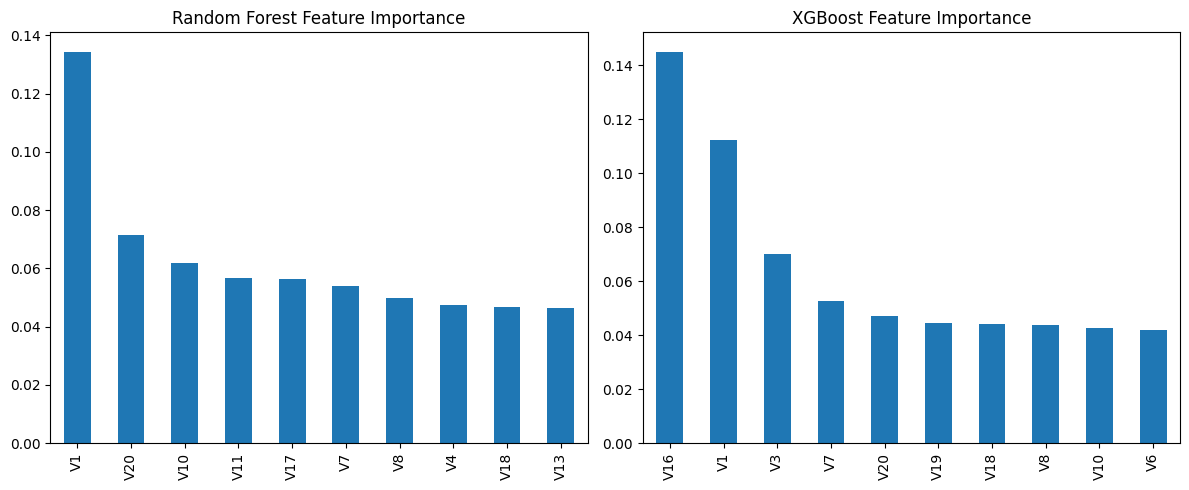

In [ ]:
rf_imp = pd.Series(rf.feature_importances_, index=df.columns[:-1])
xgb_imp = pd.Series(xgb.feature_importances_, index=df.columns[:-1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
rf_imp.sort_values(ascending=False).head(10).plot(kind='bar', title='Random Forest Feature Importance')
plt.subplot(1, 2, 2)
xgb_imp.sort_values(ascending=False).head(10).plot(kind='bar', title='XGBoost Feature Importance')
plt.tight_layout()
plt.show()